# <center>Simple Linear Regression</center>


#### About this Notebook
In this notebook, we learn how to use `scikit-learn` to implement simple linear regression using dataset that is related to Fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

**`FuelConsumptionCo2.csv`** contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


- Supervised Learning:
    - Classification
    - **Regression**
#### Practice

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


- Example = record = sample ...

![](https://datalya.com/blog/content/4-machine-learning/11-machine-learning-vs-traditional-programming-paradigm/ml_vs_traditional_paradigm.png)

In [ ]:
# if data = A:
#     apply rule A
# elif data = B:
#     appy rule B

## Sanity check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
df.memory_usage().sum()/1024

108.4921875

In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
df[['MODEL','MAKE','VEHICLECLASS','FUELTYPE','TRANSMISSION']].describe()

,MODEL,MAKE,VEHICLECLASS,FUELTYPE,TRANSMISSION
count,1067,1067,1067,1067,1067
unique,663,39,16,4,22
top,F150 FFV,FORD,MID-SIZE,X,A6
freq,8,90,178,514,222


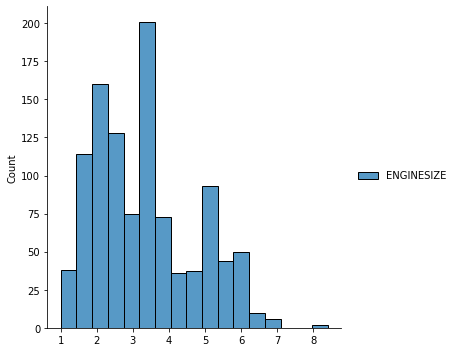

In [11]:
sns.displot(data=df[['ENGINESIZE']])
plt.show()

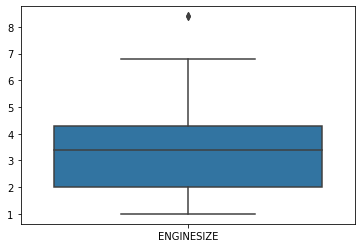

In [12]:
sns.boxplot(data=df[['ENGINESIZE']]) #boxplot, violinplot, boxenplot
plt.show()

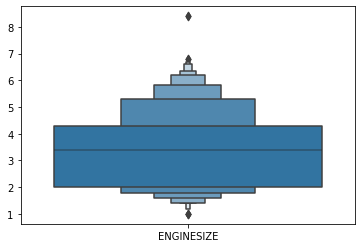

In [13]:
sns.boxenplot(data=df[['ENGINESIZE']]) #boxplot, violinplot, boxenplot
plt.show()

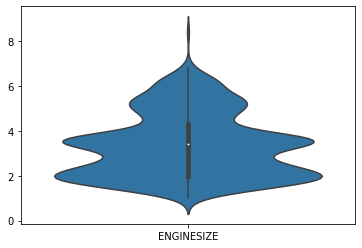

In [14]:
sns.violinplot(data=df[['ENGINESIZE']]) #boxplot, violinplot, boxenplot
plt.show()

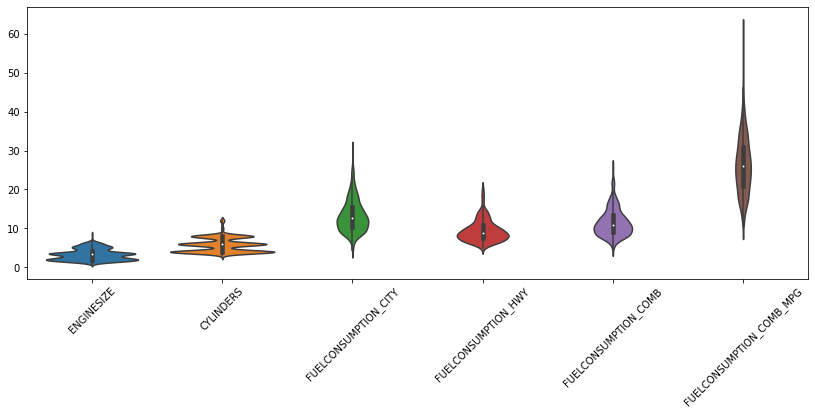

In [15]:
plt.figure(figsize=(14,5))
sns.violinplot(data=df.drop(columns=['MODELYEAR','CO2EMISSIONS']))
plt.xticks(rotation=45)
plt.show()

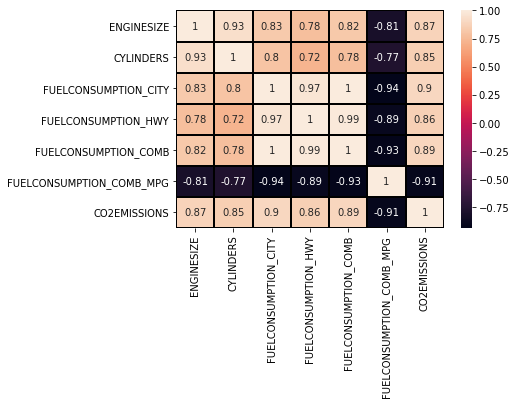

In [16]:
sns.heatmap(df.drop(columns='MODELYEAR').corr(), annot=True, linewidths = 0.01, linecolor='black')
plt.show()

Correlation
    - Feature vs Feature
    - Feature vs Labels
Pre - Feature Selection:
    - Corr()
    - P-value
    - K-S

In [17]:
df.MODELYEAR.unique()

array([2014], dtype=int64)

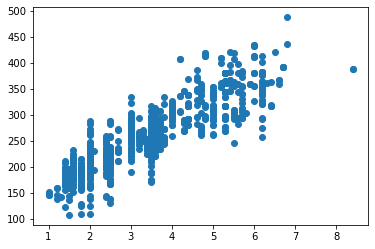

In [18]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

![](https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)
![](https://i2.wp.com/trituenhantao.io/wp-content/uploads/2020/01/k-fold.png?fit=1200%2C592&ssl=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df[['ENGINESIZE']], df.CO2EMISSIONS, test_size=0.2, random_state=42)  #80-20, 70-30, 75-25

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

NameError: name 'X_train' is not defined

In [36]:
model = LinearRegression() # Manual, GridSearch, RandomSearch, ...
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.coef_

array([38.99297872])

In [38]:
model.intercept_

126.28970217408721

In [40]:
pred1 = model.predict(X_test)

In [53]:
# pred1

In [48]:
pred2 = model.coef_[0]*X_test + model.intercept_  # y = a*x+b
# np.array(pred2)

In [54]:
comparison = pd.DataFrame()
comparison['Manual'] = pred2
comparison['Auto'] = list(pred1)
comparison.head(3)

,Manual,Auto
732,309.556702,309.556702
657,262.765128,262.765128
168,266.664426,266.664426


> Mean quared error

![](https://vedexcel.com/wp-content/uploads/2020/12/MSE_Python.gif)

> Mean absolute error

![](https://www.worldofitech.com/wp-content/uploads/2020/05/new-formula-1.png)

> R2 score

![](https://i.stack.imgur.com/3vEI6.png)

In [55]:
mean_squared_error(y_test,pred1)

985.9381692274999

In [56]:
mean_absolute_error(y_test,pred1)

24.09725741170784

In [57]:
r2_score(y_test,pred1)

0.7615595731934373